<h1><b>crop yield prediction model

<h3><b>Problem Definition</b></h3>
<p>The goal of this project is to develop a crop yield prediction model using machine learning techniques. The model will forecast crop yields based on historical data, weather patterns, and soil conditions. Crop yield prediction is a significant aspect of modern agriculture, as it allows for proactive management of agricultural resources, helps optimize production, and can mitigate risks associated with climate change and fluctuating weather patterns.</p>

<h3><b>Why This Problem?</b></h3>
<p>With an ever-growing global population, efficient agricultural practices are vital to meet the rising food demands. Crop yield prediction models support farmers and agricultural stakeholders by providing insights into future yields. By understanding how different factors like weather, soil conditions, and historical yield data influence production, these models can enhance decision-making processes. Accurate forecasts can help in planning resources, reducing crop loss, and ultimately increasing food security.</p>

<h3><b>Your Approach</b></h3>
<p>To build the crop yield prediction model, the following approach was implemented:</p>

<ol>
<li>
<b>Data Collection and Preprocessing:</b> The dataset includes features such as Area, Item, Year, Yield (hg/ha), average rainfall (mm/year), pesticide usage (tonnes), and average temperature. Each feature was analyzed for missing values, duplicate values, and necessary preprocessing steps like data cleaning and scaling were applied.
</li>

<li><b>Data Visualiztaion:</b>After Data Collection and Processing the processed data is represented in the form of graphs and diagrams.</li>

<li><b>Model Selection:</b> For this task I have choose 3 models namels:<br>
1. Linear Regression<br/>
2. Decision Tree<br/>
3. K-Nearest Neighbours (KNN).</li>


<li><b>Model Training and Testing:</b> The dataset was split into training and testing sets of 80-20 . The model was trained on the training set and validated on the test set to evaluate its performance.</li>

<li><b>Evaluation:</b> To measure the accuracy of the predictions, metrics Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R²) Root Mean Squared Error (RMSE) are being calculated and then represented in graphical form compaering the three modesls.</li>

<li><b>Prediction:</b> After evaluation sample data are passed to the three models and the predictions are made.</li>
<ol>

<h2>Data Collection and Preprocessing</h2>

In [103]:
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns





<ul>
  <li><code>import pandas as pd</code>  
    <br>Used to load, manipulate, and analyze data in a structured format (DataFrames).</li>
  
  <li><code>from sklearn.model_selection import train_test_split</code>  
    <br>Splits the dataset into training and testing sets for model evaluation.</li>
  
  <li><code>from sklearn.linear_model import LinearRegression</code>  
    <br>Provides the linear regression model for predicting crop yield.</li>
  
  <li><code>from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score</code>  
    <br>Metrics to evaluate model performance: error measurement (MSE, MAE) and fit quality (R² score).</li>
  
  <li><code>import os</code>  
    <br>Used for interacting with the operating system, such as handling file paths if needed.</li>
  
  <li><code>from sklearn.compose import ColumnTransformer</code>  
    <br>Allows transformations on specific columns, useful for encoding and scaling features.</li>
  
  <li><code>from sklearn.preprocessing import OneHotEncoder, StandardScaler</code>  
    <br><code>OneHotEncoder</code>: Converts categorical variables to numeric format.<br>
    <code>StandardScaler</code>: Scales features for improved model performance.</li>
</ul>


In [104]:
df = pd.read_csv('./yield_df.csv')


In [105]:
df.head()

,S.No,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [106]:
df.drop('S.No',axis=1,inplace=True)
# Droping the S.No column as it is not required and might cause problems during the training process

In [107]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [108]:
# checking if the data have any null values
print(df.isnull().sum())

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [109]:
df.shape
# rows and colums of the dataset

(28242, 7)

In [110]:
df.duplicated().sum()
# checking for duplicate values and droping it

2310

In [111]:
df.drop_duplicates(inplace=True)


In [112]:
df.duplicated().sum()

0

<h1><b>Data Visualiztaion</h2>

<h3><b>Item Count

Showing the quantity of different types of crop in the data set

<ipython-input-113-4d0bfc4b5dc5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Item'], palette="viridis")


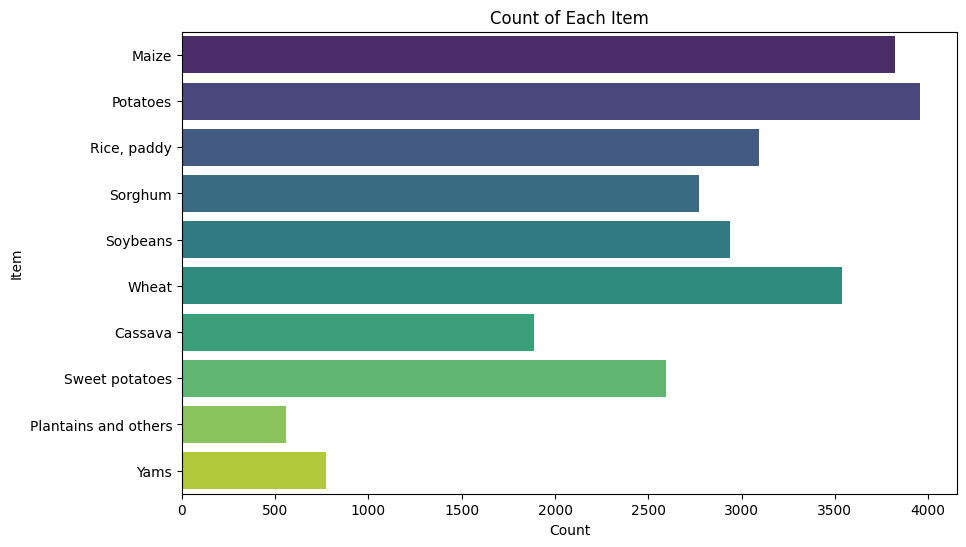

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Item'], palette="viridis")
plt.title("Count of Each Item")
plt.xlabel("Count")
plt.ylabel("Item")
plt.show()

# Average Rainfal

plots the trend of average rainfall over years, showing changes and patterns over time. This helps us understand rainfall’s potential impact on crop yields.

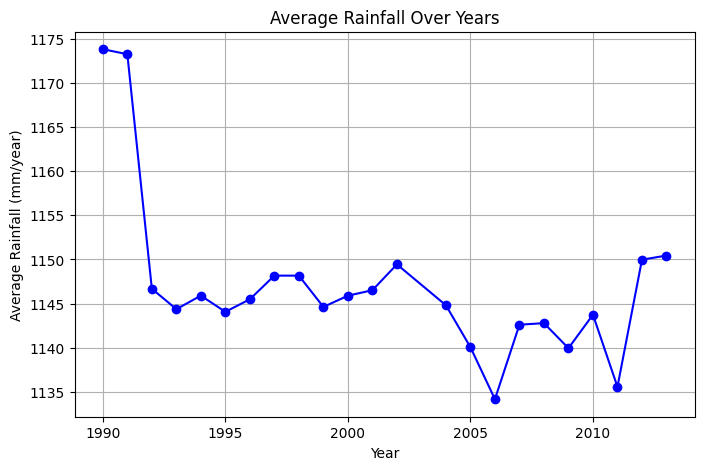

In [114]:
df_rainfall = df.groupby("Year")["average_rain_fall_mm_per_year"].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(df_rainfall["Year"], df_rainfall["average_rain_fall_mm_per_year"], color="b", marker="o")
plt.title("Average Rainfall Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm/year)")
plt.grid(True)
plt.show()


# Yield Per Country Graph


This code calculates and plots total crop yield by country, allowing easy comparison of productivity across countries. The bar plot highlights geographic yield differences.

<ipython-input-121-b6eea81bc8a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yield_per_country, y="Area", x="hg/ha_yield", palette="viridis")


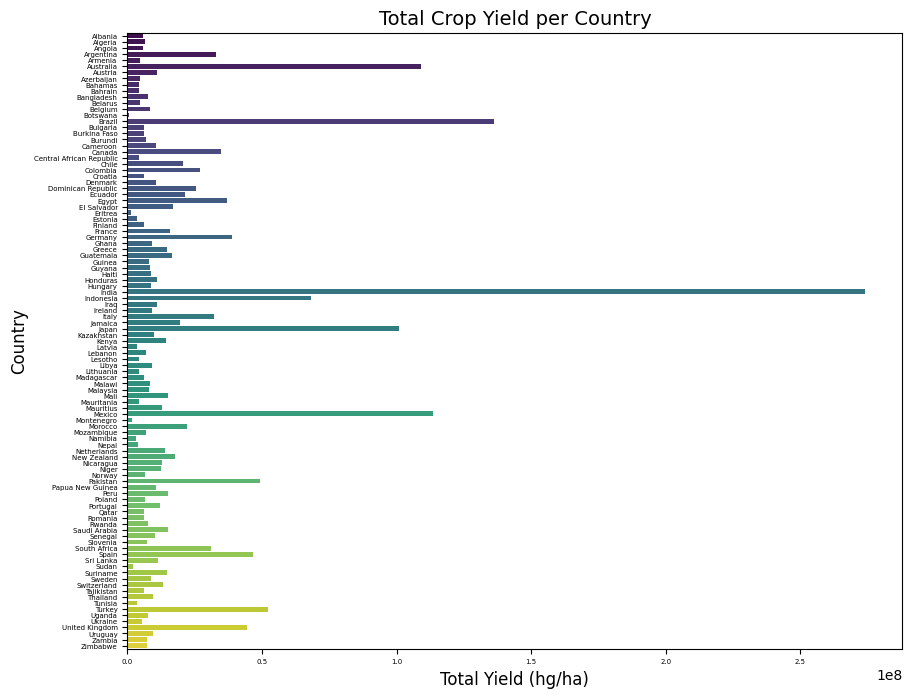

In [121]:
# Calculate total yield per country
yield_per_country = df.groupby("Area")["hg/ha_yield"].sum().reset_index()

# Plot the total yield per country
plt.figure(figsize=(10, 8))
sns.barplot(data=yield_per_country, y="Area", x="hg/ha_yield", palette="viridis")
plt.title("Total Crop Yield per Country", fontsize=14)
plt.xlabel("Total Yield (hg/ha)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()


#Average Yield by Year

Average crop yield over the years, showing trends in yield changes. The line plot helps identify increases or decreases in yield over time, which is useful for analyzing productivity trends and understanding factors influencing crop yield.

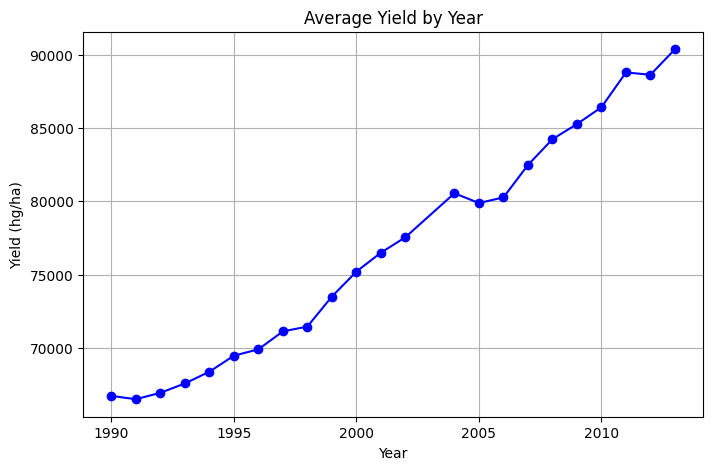

In [122]:
df_yield_year = df.groupby("Year")["hg/ha_yield"].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(df_yield_year["Year"], df_yield_year["hg/ha_yield"], color="blue", marker="o")
plt.title("Average Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")
plt.grid(True)
plt.show()



By calculating correlations between numeric features, the heatmap reveals relationships among variables, helping identify which features might influence each other or the target variable (crop yield). This visualization aids in feature selection and understanding interactions between variables in the dataset.

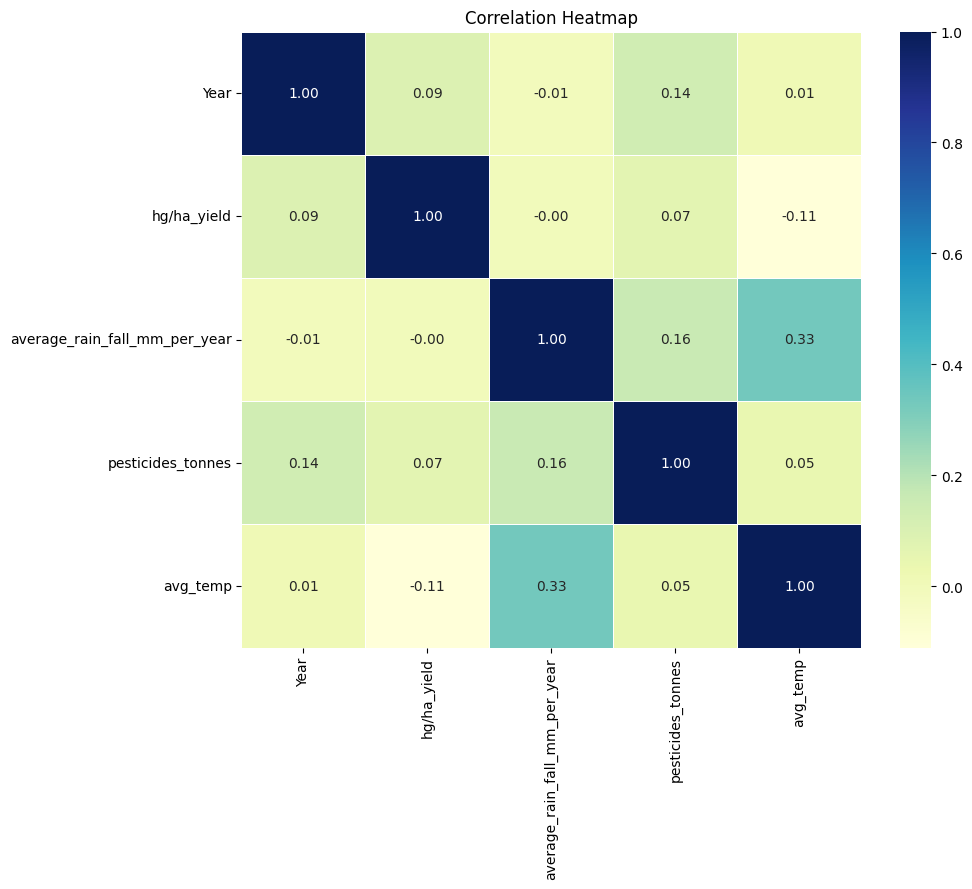

In [123]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<h1>Data Spliting & Training Models

In [124]:
# selecting fetaures and target variable and splitting the daat in 80 - 20 set
X = df[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y = df['hg/ha_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


In [125]:
# Define preprocessing: standard scaling for numerical features, one-hot encoding for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('onehot', OneHotEncoder(drop='first'), ['Area', 'Item'])
    ]
)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

<ul>
  <li><strong>Standard Scaling for Numerical Features</strong>:
    <br>Using <code>StandardScaler</code> on numerical features (<code>Year</code>, <code>average_rain_fall_mm_per_year</code>, <code>pesticides_tonnes</code>, <code>avg_temp</code>) scales them to have a mean of 0 and a standard deviation of 1.
    <br>Scaling is important because features with large ranges can disproportionately influence the model. Standardization ensures that all numerical features contribute equally.</li>
  
  <li><strong>One-Hot Encoding for Categorical Features</strong>:
    <br><code>OneHotEncoder</code> is applied to categorical features (<code>Area</code>, <code>Item</code>) to convert them into binary columns, making the data fully numeric and ready for the model.
    <br><code>drop='first'</code> avoids multicollinearity by removing one category level, reducing the risk of redundant data affecting model performance.</li>
</ul>

<p>These preprocessing steps transform the dataset into a form that the model can efficiently learn from, improving accuracy and consistency in training and predictions.</p>


###**Training Models**

###**Linear Regression Model**

In [126]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred_lr = model.predict(X_test_preprocessed)

###**Decision Tree Regressor**

In [127]:
# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test_preprocessed)

###**K-Nearest Neighbours**

In [128]:
# Initialize the KNN Regressor with a chosen number of neighbors 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_preprocessed, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test_preprocessed)

<h1><b>Model Evaluation

*calculating MSE, MAE, r2, RMSE for all three models*

In [129]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared (R²): {r2_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}\n")




mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Decision Tree Metrics:")
print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"Mean Absolute Error (MAE): {mae_tree}")
print(f"R-squared (R²): {r2_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree}\n")





mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)


print("KNN Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"R-squared (R²): {r2_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")


Linear Regression Metrics:
Mean Squared Error (MSE): 1817340212.8270962
Mean Absolute Error (MAE): 29907.497694405192
R-squared (R²): 0.7473129336888378
Root Mean Squared Error (RMSE): 42630.2734312964

Decision Tree Metrics:
Mean Squared Error (MSE): 147393915.83555043
Mean Absolute Error (MAE): 3935.6319645267013
R-squared (R²): 0.9795060187840883
Root Mean Squared Error (RMSE): 12140.589599996798

KNN Regression Metrics:
Mean Squared Error (MSE): 108307116.54506266
Mean Absolute Error (MAE): 4617.837863890495
R-squared (R²): 0.9849407351759311
Root Mean Squared Error (RMSE): 10407.07050735521


               Model           MSE           MAE        R²          RMSE
0  Linear Regression  1.817340e+09  29907.497694  0.747313  42630.273431
1      Decision Tree  1.473939e+08   3935.631965  0.979506  12140.589600
2          KNN (k=5)  1.083071e+08   4617.837864  0.984941  10407.070507


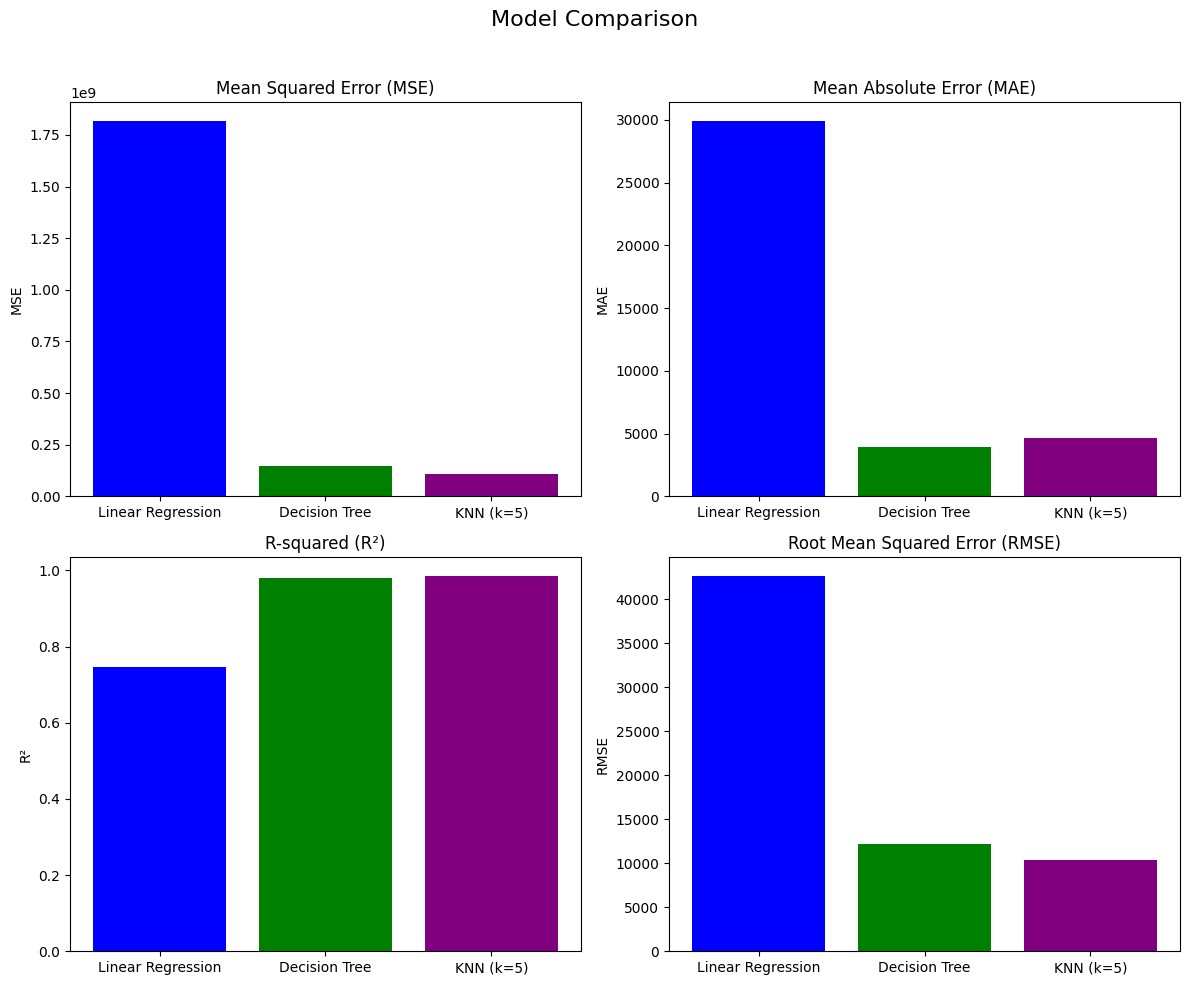

In [130]:


# Metrics from each model
metrics = {
    "Model": ["Linear Regression", "Decision Tree", "KNN (k=5)"],
    "MSE": [mse_lr, mse_tree, mse_knn],
    "MAE": [mae_lr, mae_tree, mae_knn],
    "R²": [r2_lr, r2_tree, r2_knn],
    "RMSE": [rmse_lr, rmse_tree, rmse_knn]
}

# Create a DataFrame for tabular display
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot bar charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Model Comparison", fontsize=16)

# MSE
axes[0, 0].bar(metrics["Model"], metrics["MSE"], color=['blue', 'green', 'purple'])
axes[0, 0].set_title("Mean Squared Error (MSE)")
axes[0, 0].set_ylabel("MSE")

# MAE
axes[0, 1].bar(metrics["Model"], metrics["MAE"], color=['blue', 'green', 'purple'])
axes[0, 1].set_title("Mean Absolute Error (MAE)")
axes[0, 1].set_ylabel("MAE")

# R²
axes[1, 0].bar(metrics["Model"], metrics["R²"], color=['blue', 'green', 'purple'])
axes[1, 0].set_title("R-squared (R²)")
axes[1, 0].set_ylabel("R²")

# RMSE
axes[1, 1].bar(metrics["Model"], metrics["RMSE"], color=['blue', 'green', 'purple'])
axes[1, 1].set_title("Root Mean Squared Error (RMSE)")
axes[1, 1].set_ylabel("RMSE")

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


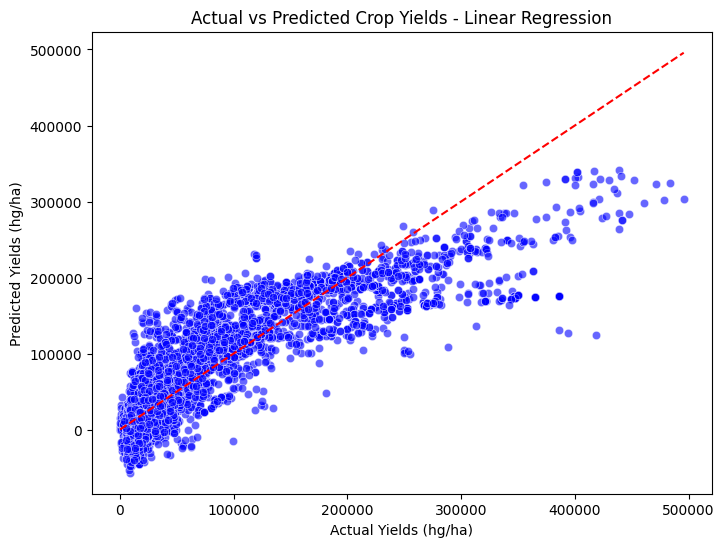

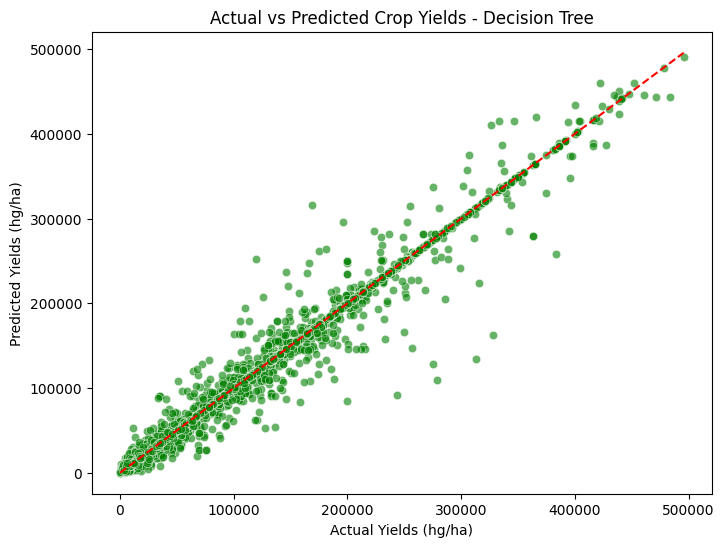

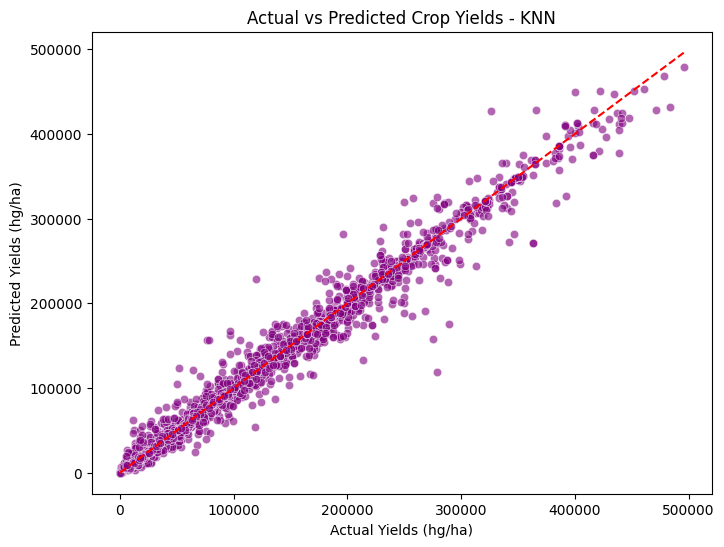

In [131]:




# Linear Regression Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yields (hg/ha)")
plt.ylabel("Predicted Yields (hg/ha)")
plt.title("Actual vs Predicted Crop Yields - Linear Regression")
plt.show()

# Decision Tree Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yields (hg/ha)")
plt.ylabel("Predicted Yields (hg/ha)")
plt.title("Actual vs Predicted Crop Yields - Decision Tree")
plt.show()

# KNN Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_knn, color="purple", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yields (hg/ha)")
plt.ylabel("Predicted Yields (hg/ha)")
plt.title("Actual vs Predicted Crop Yields - KNN")
plt.show()


Conclusion: Compared to Linear Regression Decision Tree and KNN will give more accurate predictiona and also have less error.

#**Predictions**

In [132]:


# Define the prediction function to use all three models
def predict_yield_all_models(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame with the input features
    features = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)

    # Make predictions with each model
    predicted_yield_lr = model.predict(transformed_features)[0]
    predicted_yield_tree = tree_model.predict(transformed_features)[0]
    predicted_yield_knn = knn.predict(transformed_features)[0]

    # Print the predictions from each model
    print("Predictions for the sample data:")
    print(f"Linear Regression Prediction: {predicted_yield_lr:.2f} hg/ha")
    print(f"Decision Tree Prediction: {predicted_yield_tree:.2f} hg/ha")
    print(f"KNN Prediction: {predicted_yield_knn:.2f} hg/ha")



# Example usage
Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.0
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'

# Call the function and get predictions for all models
predictions = predict_yield_all_models(
    Year,
    average_rain_fall_mm_per_year,
    pesticides_tonnes,
    avg_temp,
    Area,
    Item
)

# Output predictions dictionary if needed
print(predictions)


Predictions for the sample data:
Linear Regression Prediction: 20405.94 hg/ha
Decision Tree Prediction: 36613.00 hg/ha
KNN Prediction: 30938.20 hg/ha
None
